# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)

display(data_train.info())
display(data_train.describe())
display(data_test.info())
display(data_test.describe())
display(data_full.info())
display(data_full.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


### Вывод

Таблица train

- Информация о структуре данных - двумерная(DataFrame);
- таблица имеет 14149 строк и 87 столбцов; 
- присутствуют названия столбцов и количество ненулевых значений;
- в таблице присутствуют значения типов float(86 столбцов), object(1 столбeц);
- использование памяти.

Таблица test

- Информация о структуре данных - двумерная(DataFrame);
- таблица имеет 5290 строк и 53 столбца; 
- присутствуют названия столбцов и количество ненулевых значений;
- в таблице присутствуют значения типов float(52 столбца), object(1 столбeц);
- использование памяти.

Таблица full

- Информация о структуре данных - двумерная(DataFrame);
- таблица имеет 19439 строк и 87 столбцов; 
- присутствуют названия столбцов и количество ненулевых значений;
- в таблице присутствуют значения типов float(86 столбцов), object(1 столбeц);
- использование памяти.

Посмотрим, есть ли пропуски:

In [3]:
display(data_train.isna().sum().sum())
display(data_test.isna().sum().sum())
display(data_full.isna().sum().sum())

4100

90

4481

Пропуски обнаружены, обработаем их в пункте 1.4.

Проверим дубликаты:

In [4]:
dubl_data_train = data_train.duplicated().sum()
dubl_data_test = data_test.duplicated().sum()
dubl_data_full = data_full.duplicated().sum()
display(dubl_data_train)
display(dubl_data_test)
display(dubl_data_full)

0

0

0

Дубликатов нет.

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака:

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery = 100 * ((C * (F-T)) / (F * (C-T)))   

In [6]:
mean_absolute_error(data_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

Значение MAE стремится к 0,это значит наши расчеты совпадают с признаком rougher.output.recovery

In [7]:
display(data_train.shape)
display(data_test.shape)
display(data_full.shape)

(14149, 86)

(5290, 52)

(19439, 86)

### Проанализировать признаки, недоступные в тестовой выборке. Что это за параметры?

In [8]:
data_test_plus = data_test.join(data_full[['final.output.recovery','rougher.output.recovery']])

In [9]:
print('Было:',data_test.shape,'\nСтало',data_test_plus.shape)

Было: (5290, 52) 
Стало (5290, 54)


В тестовой выборке отсутствуют 34 столбца. К данной выборке добавили только столбцы - целевые признаки это 'final.output.recovery' и 'rougher.output.recovery'.

### Проведем предобработку данных:

Заполним пропуски:

In [10]:
data_train = data_train.interpolate(method='time')
data_test_plus = data_test_plus.interpolate(method='time')

In [11]:
display(data_train.isna().sum().sum())
display(data_test_plus.isna().sum().sum())

0

0

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:

In [12]:
def name_columns(data):
    rougher = []
    primary_cleaner = []
    secondary_cleaner = []
    final = []
    other_stage = []
    input_list = []
    output = []
    state = []
    calculation = []
    other_params = []
    for i in data.columns:
        if 'rougher' in i: 
            rougher.append(i)
        elif  'primary_cleaner' in i: 
            primary_cleaner.append(i)  
        elif  'secondary_cleaner' in i: 
            secondary_cleaner.append(i)
        elif 'final' in i: 
            final.append(i)
        else: 
            other_stage.append(i)
            
        if 'input' in i: 
            input_list.append(i)
        elif  'output' in i: 
            output.append(i)
        elif  'state' in i: 
            state.append(i)  
        elif  'calculation' in i: 
            calculation.append(i)
        else: 
            other_params.append(i)
    return rougher, primary_cleaner, secondary_cleaner, final, other_stage,input_list,output,state,calculation,other_params

In [13]:
au_list = []
ag_list = []
pb_list = []
for i in data_train.columns:
    if 'au' in i:
        au_list.append(i)
    if 'ag' in i:
        ag_list.append(i)
    if 'pb' in i:
        pb_list.append(i)

In [14]:
display(au_list)
display(ag_list)
display(pb_list)

['final.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au']

['final.output.concentrate_ag',
 'final.output.tail_ag',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_ag',
 'rougher.input.feed_ag',
 'rougher.output.concentrate_ag',
 'rougher.output.tail_ag',
 'secondary_cleaner.output.tail_ag']

['final.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'rougher.input.feed_pb',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_pb']

In [15]:
def plot_concentrate(data, col1, col2, col3, title):
    fig = plt.figure(figsize=(10,6))
    sns.distplot(data[col1], color='red')
    sns.distplot(data[col2], color='orange')
    sns.distplot(data[col3], color='green')

    fig.legend([col1,col2,col3])
    plt.xlabel(title)
    plt.ylabel('Значения параметра')
    plt.show()

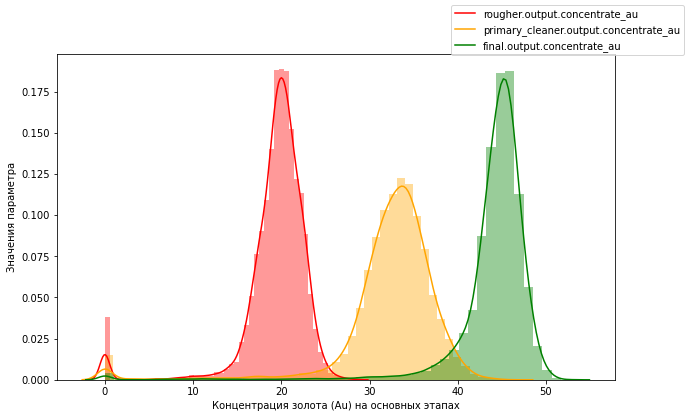

In [16]:
plot_concentrate(data = data_train,
              col1 = 'rougher.output.concentrate_au',
              col2 = 'primary_cleaner.output.concentrate_au',
              col3 = 'final.output.concentrate_au',
              title = 'Концентрация золота (Au) на основных этапах',
)

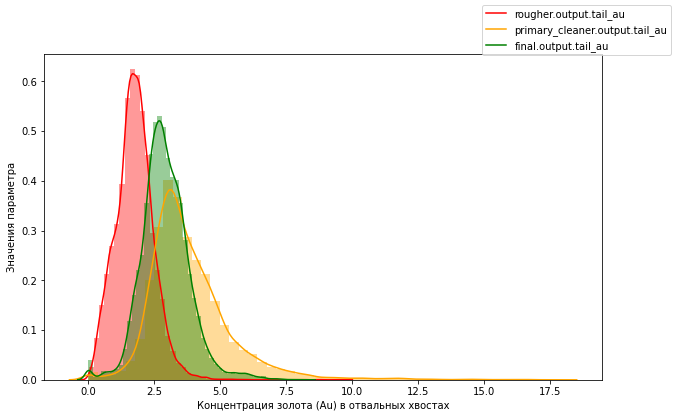

In [17]:
plot_concentrate(data = data_train,
              col1 = 'rougher.output.tail_au',
              col2 = 'primary_cleaner.output.tail_au',
              col3 = 'final.output.tail_au',
              title = 'Концентрация золота (Au) в отвальных хвостах',
)

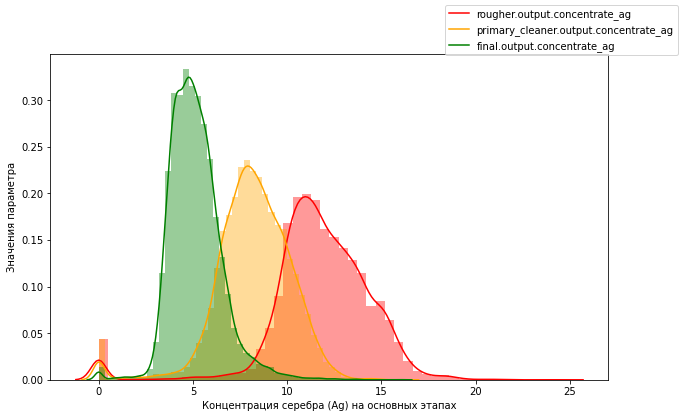

In [18]:
plot_concentrate(data = data_train,
              col1 = 'rougher.output.concentrate_ag',
              col2 = 'primary_cleaner.output.concentrate_ag',
              col3 = 'final.output.concentrate_ag',
              title = 'Концентрация серебра (Ag) на основных этапах',
)

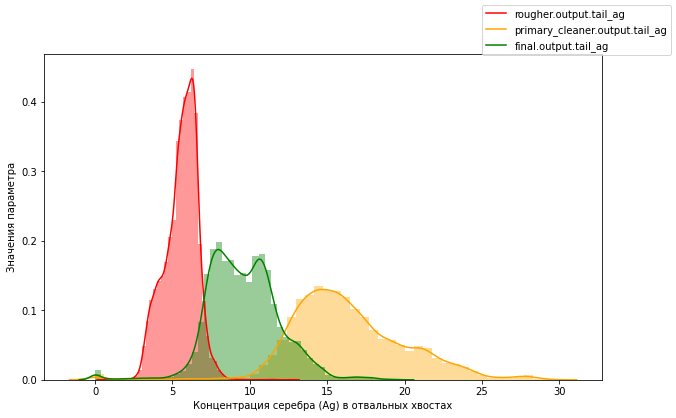

In [19]:
plot_concentrate(data = data_train,
              col1 = 'rougher.output.tail_ag',
              col2 = 'primary_cleaner.output.tail_ag',
              col3 = 'final.output.tail_ag',
              title = 'Концентрация серебра (Ag) в отвальных хвостах',
)

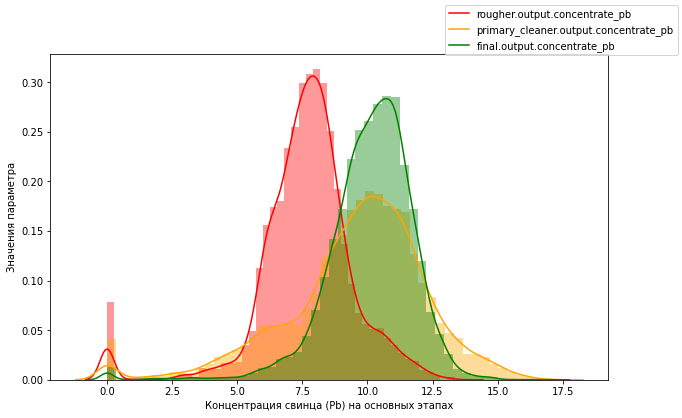

In [20]:
plot_concentrate(data = data_train,
              col1 = 'rougher.output.concentrate_pb',
              col2 = 'primary_cleaner.output.concentrate_pb',
              col3 = 'final.output.concentrate_pb',
              title = 'Концентрация свинца (Pb) на основных этапах',
)

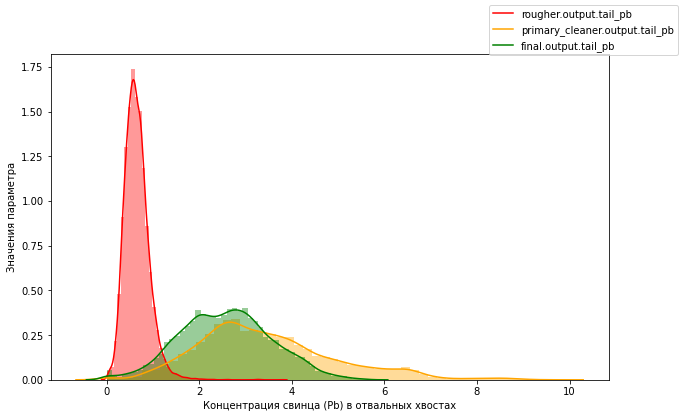

In [21]:
plot_concentrate(data = data_train,
              col1 = 'rougher.output.tail_pb',
              col2 = 'primary_cleaner.output.tail_pb',
              col3 = 'final.output.tail_pb',
              title = 'Концентрация свинца (Pb) в отвальных хвостах',
)

#### Вывод:

- Au:
Концентрация золота с каждым этапом возрастает, так и должно быть, так как часть уходит в отвальные хвосты. Концентрация от флотации до готового продукта увеличивается более чем в 2,5 раза.
В отвальных хвостах концентрация почти не меняется.
- Ag:
Концентрация серебра в породе с каждым этапом падает, а в отвальных хвостах наоборот возрастает.
- Pb:
Концентрация свинца увеличивается с каждым этапом, также и в отвальных хвостах.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

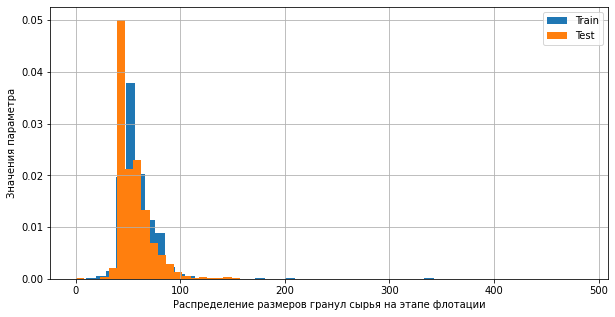

In [22]:
data_train['rougher.input.feed_size'].hist(bins=50,figsize=(10,5), density=True)
data_test_plus['rougher.input.feed_size'].hist(bins=50, density=True)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на этапе флотации')
plt.ylabel('Значения параметра')
plt.show()

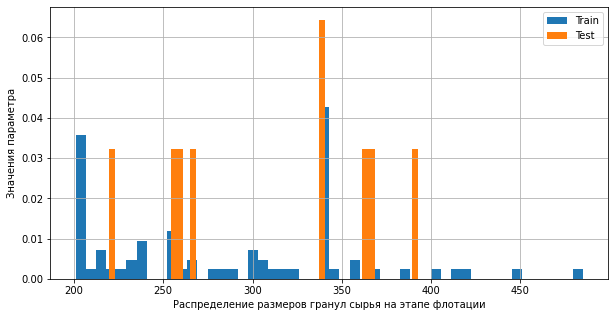

In [23]:
data_train[data_train['rougher.input.feed_size']>200]['rougher.input.feed_size'].hist(bins=50,figsize=(10,5), density=True)
data_test_plus[data_test_plus['rougher.input.feed_size']>200]['rougher.input.feed_size'].hist(bins=50, density=True)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на этапе флотации')
plt.ylabel('Значения параметра')
plt.show()

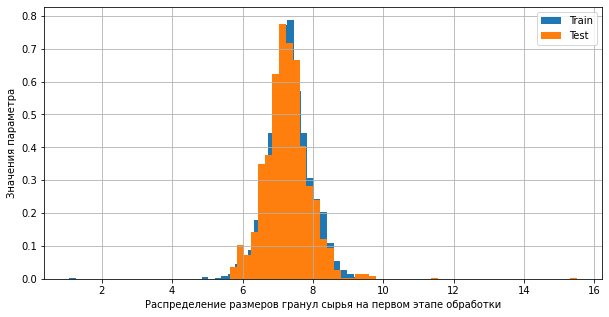

In [24]:
data_train['primary_cleaner.input.feed_size'].hist(bins=50,figsize=(10,5), density=True)
data_test_plus['primary_cleaner.input.feed_size'].hist(bins=50, density=True)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на первом этапе обработки')
plt.ylabel('Значения параметра')
plt.show()

#### Вывод:

На первом этапе обработки размеры гранул сильно уменьшаются по сравнению с флотацией, было в районе 50, упало до 7.
На этапе флотации на обоих выборках видны выбросы, где ['rougher.input.feed_size'] > 200.
Распределения для обучающей и тестовой выборки схожи.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах:

In [25]:
def total_concentrate_rougher_input(row):
    au = row['rougher.input.feed_au']
    ag = row['rougher.input.feed_ag']
    pb = row['rougher.input.feed_pb']
    summa = au+ag+pb
    return summa

In [26]:
def total_concentrate_rougher(row):
    au = row['rougher.output.concentrate_au']
    ag = row['rougher.output.concentrate_ag']
    pb = row['rougher.output.concentrate_pb']
    summa = au+ag+pb
    return summa

In [27]:
def total_concentrate_rougher_tail(row):
    au = row['rougher.output.tail_au']
    ag = row['rougher.output.tail_ag']
    pb = row['rougher.output.tail_pb']
    summa = au+ag+pb
    return summa

In [28]:
def total_concentrate_final(row):
    au = row['final.output.concentrate_au']
    ag = row['final.output.concentrate_ag']
    pb = row['final.output.concentrate_pb']
    summa = au+ag+pb
    return summa

In [29]:
def total_concentrate_final_tail(row):
    au = row['final.output.tail_au']
    ag = row['final.output.tail_ag']
    pb = row['final.output.tail_pb']
    summa = au+ag+pb
    return summa

In [30]:
data_train['rougher.input.feed.total'] = data_train.apply(total_concentrate_rougher_input,axis=1)

data_train['rougher.output.concentrate.total'] = data_train.apply(total_concentrate_rougher,axis=1)
data_train['rougher.output.tail.total'] = data_train.apply(total_concentrate_rougher_tail,axis=1)

data_train['final.output.concentrate.total'] = data_train.apply(total_concentrate_final,axis=1)
data_train['final.output.tail.total'] = data_train.apply(total_concentrate_final_tail,axis=1)

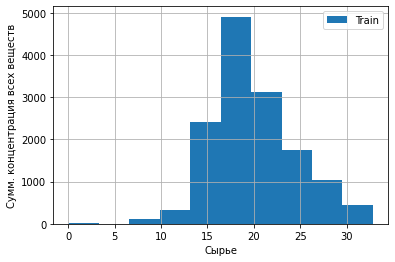

In [31]:
data_train['rougher.input.feed.total'].hist()

plt.legend(['Train'])
plt.xlabel('Сырье')
plt.ylabel('Сумм. концентрация всех веществ')
plt.show()

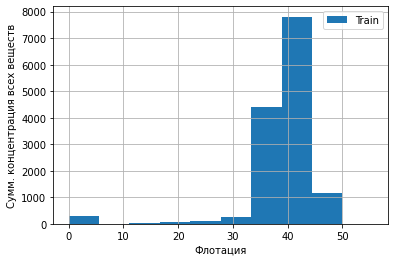

In [32]:
data_train['rougher.output.concentrate.total'].hist()

plt.legend(['Train'])
plt.xlabel('Флотация')
plt.ylabel('Сумм. концентрация всех веществ')
plt.show()

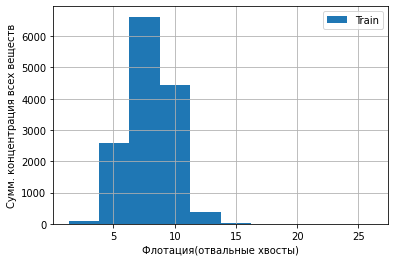

In [33]:
data_train['rougher.output.tail.total'].hist()

plt.legend(['Train'])
plt.xlabel('Флотация(отвальные хвосты)')
plt.ylabel('Сумм. концентрация всех веществ')
plt.show()

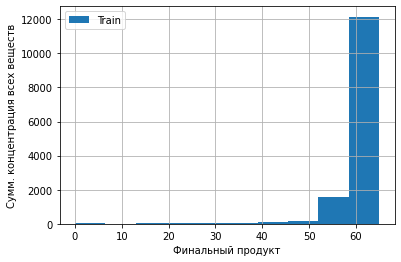

In [34]:
data_train['final.output.concentrate.total'].hist()

plt.legend(['Train'])
plt.xlabel('Финальный продукт')
plt.ylabel('Сумм. концентрация всех веществ')
plt.show()

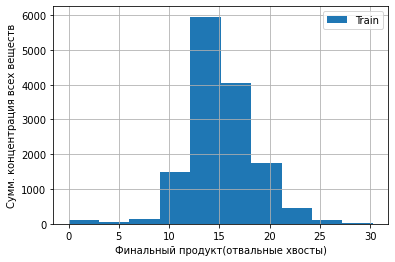

In [35]:
data_train['final.output.tail.total'].hist()

plt.legend(['Train'])
plt.xlabel('Финальный продукт(отвальные хвосты)')
plt.ylabel('Сумм. концентрация всех веществ')
plt.show()

На каждом этапе видны выбросы, удалим их далее:

Выбросы на этапе сырья:

<AxesSubplot:>

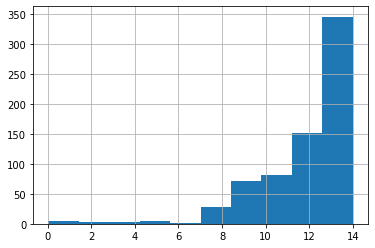

In [36]:
data_train[data_train['rougher.input.feed.total']<=14]['rougher.input.feed.total'].hist()

In [37]:
data_train_blowout_input = data_train[data_train['rougher.input.feed.total']<=14]['rougher.input.feed.total'].index
print('Удалим', data_train_blowout_input.shape, 'строк')

Удалим (696,) строк


In [38]:
data_train = data_train.drop(data_train_blowout_input)

Выбросы на этапе Флотация:

<AxesSubplot:>

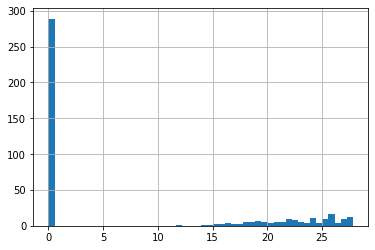

In [39]:
data_train[data_train['rougher.output.concentrate.total']<=28]['rougher.output.concentrate.total'].hist(bins=50)

In [40]:
data_train_blowout_rougher = data_train[data_train['rougher.output.concentrate.total']<=28]['rougher.output.concentrate.total'].index
print('Удалим', data_train_blowout_rougher.shape, 'строки')

Удалим (438,) строки


In [41]:
data_train = data_train.drop(data_train_blowout_rougher)

Выбросы на финальном этапе:

<AxesSubplot:>

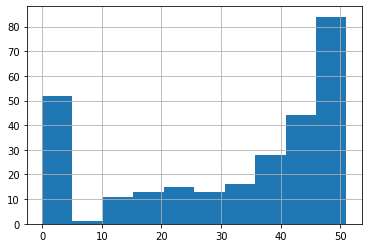

In [42]:
data_train[data_train['final.output.concentrate.total']<=51]['final.output.concentrate.total'].hist()

In [43]:
data_train_blowout_final = data_train[data_train['final.output.concentrate.total']<=51]['final.output.concentrate.total'].index
print('Удалим', data_train_blowout_final.shape, 'строк')

Удалим (277,) строк


In [44]:
data_train = data_train.drop(data_train_blowout_final)

In [45]:
data_train.shape

(12738, 91)

## Модель

### Напишем функцию для вычисления итоговой sMAPE:

Оставим одинаковое количество столбцов в обеих выборках:

In [46]:
data_train = data_train[data_test_plus.columns]

In [47]:
display(data_train.shape)
display(data_test_plus.shape)

(12738, 54)

(5290, 54)

In [48]:
feature_train_rougher = data_train.drop(['rougher.output.recovery'], axis=1) #признаки
target_train_rougher = data_train['rougher.output.recovery'] #целевой признак

feature_test_rougher = data_test_plus.drop(['rougher.output.recovery'], axis=1) #признаки
target_test_rougher = data_test_plus['rougher.output.recovery'] #целевой признак

feature_train_final = data_train.drop(['final.output.recovery'], axis=1) #признаки
target_train_final = data_train['final.output.recovery'] #целевой признак

feature_test_final = data_test_plus.drop(['final.output.recovery'], axis=1) #признаки
target_test_final = data_test_plus['final.output.recovery'] #целевой признак

In [49]:
def smape_(target,pred):
    smape = 100/len(target) * np.sum(2 * np.abs(pred - target) / (np.abs(target) + np.abs(pred)))
    return smape

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке:

#### Дерево решений в регрессии:

In [130]:
%%time

model_tree_rougher = DecisionTreeRegressor(random_state=12345)
parametrs = {'max_depth': range (1,16, 2)}
model_tree_rougher_grid = GridSearchCV(model_tree_rougher, parametrs, cv=5)
model_tree_rougher_grid.fit(feature_train_rougher, target_train_rougher)

display('Глубина дерева для лучшей модели:', model_tree_rougher_grid.best_params_)

'Глубина дерева для лучшей модели:'

{'max_depth': 5}

CPU times: user 18.7 s, sys: 6 µs, total: 18.7 s
Wall time: 19 s


In [131]:
%%time

model_tree_final = DecisionTreeRegressor(random_state=12345)
parametrs = {'max_depth': range (1,16, 2)}
model_tree_final_grid = GridSearchCV(model_tree_final, parametrs, cv=5)
model_tree_final_grid.fit(feature_train_final, target_train_final)

display('Глубина дерева для лучшей модели:', model_tree_final_grid.best_params_)

'Глубина дерева для лучшей модели:'

{'max_depth': 3}

CPU times: user 20.5 s, sys: 20 ms, total: 20.5 s
Wall time: 20.5 s


In [132]:
pred_tree_rougher = model_tree_rougher_grid.predict(feature_test_rougher)
cros_val_tree_rougher = cross_val_score(model_tree_rougher_grid, feature_train_rougher, target_train_rougher, cv=5)
smape_tree_rougher = smape_(target_test_rougher, pred_tree_rougher)

print('Оценка качества кросс-валидацией:', cros_val_tree_rougher)
print('sMAPE-флотация:', smape_tree_rougher)

Оценка качества кросс-валидацией: [-0.2250082   0.42486752 -0.42305615  0.02625853 -0.75655841]
sMAPE-флотация: 7.776747399274327


In [133]:
pred_tree_final = model_tree_final_grid.predict(feature_test_final)
cros_val_tree_final = cross_val_score(model_tree_final_grid, feature_train_final, target_train_final, cv=5)
smape_tree_final = smape_(target_test_final, pred_tree_final)

print('Оценка качества кросс-валидацией:', cros_val_tree_final)
print('sMAPE-финальный этап:', smape_tree_final)

Оценка качества кросс-валидацией: [0.39098826 0.29037846 0.2298093  0.40306654 0.11667778]
sMAPE-финальный этап: 9.35416200055352


In [134]:
total_smape = 0.25*smape_tree_rougher + 0.75*smape_tree_final

print('Итоговая sMAPE:', total_smape)

Итоговая sMAPE: 8.959808350233722


#### Случайный лес в регрессии:

In [68]:
%%time

model_forest_rougher = RandomForestRegressor(random_state=12345)
parametrs = {'max_depth': range (1,16, 2), 'n_estimators': range(10, 100, 10)}
model_forest_rougher_grid = GridSearchCV(model_forest_rougher, parametrs, cv=5)
model_forest_rougher_grid.fit(feature_train_rougher, target_train_rougher)

display('Глубина дерева и количество деревьев для лучшей модели:', model_forest_rougher_grid.best_params_)

'Глубина дерева и количество деревьев для лучшей модели:'

{'max_depth': 11, 'n_estimators': 80}

CPU times: user 1h 37min 33s, sys: 3.34 s, total: 1h 37min 37s
Wall time: 1h 38min 57s


In [69]:
%%time

model_forest_final = RandomForestRegressor(random_state=12345)
parametrs = {'max_depth': range (1,16, 2), 'n_estimators': range(10, 100, 10)}
model_forest_final_grid = GridSearchCV(model_forest_final, parametrs, cv=5)
model_forest_final_grid.fit(feature_train_final, target_train_final)

display('Глубина дерева и количество деревьев для лучшей модели:', model_forest_final_grid.best_params_)

'Глубина дерева и количество деревьев для лучшей модели:'

{'max_depth': 3, 'n_estimators': 90}

CPU times: user 1h 52min 9s, sys: 3.23 s, total: 1h 52min 12s
Wall time: 1h 53min 51s


In [70]:
%%time

pred_forest_rougher = model_forest_rougher_grid.predict(feature_test_rougher)
cros_val_forest_rougher = cross_val_score(model_forest_rougher_grid, feature_train_rougher, target_train_rougher, cv=5)
smape_forest_rougher = smape_(target_test_rougher, pred_forest_rougher)

print('Оценка качества кросс-валидацией:', cros_val_forest_rougher)
print('sMAPE-флотация:', smape_forest_rougher)

Оценка качества кросс-валидацией: [ 0.22729737  0.52527477 -0.13822123  0.25213864 -0.75393968]
sMAPE-флотация: 7.477519155512192
CPU times: user 6h 2min 38s, sys: 7.72 s, total: 6h 2min 46s
Wall time: 6h 6min 57s


In [71]:
%%time

pred_forest_final = model_forest_final_grid.predict(feature_test_final)
cros_val_forest_final = cross_val_score(model_forest_final_grid, feature_train_final, target_train_final, cv=5)
smape_forest_final = smape_(target_test_final, pred_forest_final)

print('Оценка качества кросс-валидацией:', cros_val_forest_final)
print('sMAPE-финальный этап:', smape_forest_final)

Оценка качества кросс-валидацией: [0.44168715 0.21667112 0.27218584 0.42328802 0.20140615]
sMAPE-финальный этап: 8.923135848444259
CPU times: user 5h 40min 51s, sys: 8.6 s, total: 5h 41min
Wall time: 5h 42min 15s


In [72]:
total_smape = 0.25*smape_forest_rougher + 0.75*smape_forest_final

print('Итоговая sMAPE:', total_smape)

Итоговая sMAPE: 8.561731675211242


#### Линейная регрессия:

In [76]:
model_linreg_rougher = LinearRegression()
model_linreg_rougher.fit(feature_train_rougher, target_train_rougher)
pred_linreg_rougher = model_linreg_rougher.predict(feature_test_rougher)
cros_val_linreg_rougher = cross_val_score(model_linreg_rougher, feature_train_rougher, target_train_rougher, cv=5)
smape_linreg_rougher = smape_(target_test_rougher, pred_linreg_rougher)

print('Оценка качества кросс-валидацией:', cros_val_linreg_rougher)
print('sMAPE-флотация:', smape_linreg_rougher)

Оценка качества кросс-валидацией: [ 0.23419054  0.50882074 -0.18357192  0.48247083 -0.63009255]
sMAPE-флотация: 8.481868291629159


In [77]:
model_linreg_final = LinearRegression()
model_linreg_final.fit(feature_train_final, target_train_final)
pred_linreg_final = model_linreg_final.predict(feature_test_final)
cros_val_linreg_final = cross_val_score(model_linreg_final, feature_train_final, target_train_final, cv=5)
smape_linreg_final = smape_(target_test_final, pred_linreg_final)

print('Оценка качества кросс-валидацией:', cros_val_linreg_final)
print('sMAPE-финальный этап:', smape_linreg_final)

Оценка качества кросс-валидацией: [0.11864122 0.28112185 0.30324924 0.4882697  0.1099586 ]
sMAPE-финальный этап: 11.24771747262039


In [78]:
total_smape = 0.25*smape_linreg_rougher + 0.75*smape_linreg_final

print('Итоговая sMAPE:', total_smape)

Итоговая sMAPE: 10.55625517737258


#### Модель - DummyRegressor:

In [50]:
model_const_rougher = DummyRegressor(strategy='constant', constant=target_test_rougher.mean())
model_const_rougher.fit(feature_train_rougher, target_train_rougher)
pred_const_rougher = model_const_rougher.predict(feature_test_rougher)
cros_val_const_rougher = cross_val_score(model_const_rougher, feature_train_rougher, target_train_rougher, cv=5)
smape_const_rougher = smape_(target_test_rougher, pred_const_rougher)

print('Оценка качества кросс-валидацией:', cros_val_const_rougher)
print('sMAPE-флотация:', smape_const_rougher)

Оценка качества кросс-валидацией: [-0.43122735 -0.16523116 -0.00371545 -0.06970461 -1.00717675]
sMAPE-флотация: 8.782646809148407


In [51]:
model_const_final = DummyRegressor(strategy='constant', constant=target_test_final.mean())
model_const_final.fit(feature_train_final, target_train_final)
pred_const_final = model_const_final.predict(feature_test_final)
cros_val_const_final = cross_val_score(model_const_final, feature_train_final, target_train_final, cv=5)
smape_const_final = smape_(target_test_final, pred_const_final)

print('Оценка качества кросс-валидацией:', cros_val_const_final)
print('sMAPE-финальный этап:', smape_const_final)

Оценка качества кросс-валидацией: [-0.23583282 -0.04022188 -0.10058785 -0.0033548  -0.14035135]
sMAPE-финальный этап: 9.370995594347834


In [52]:
total_smape = 0.25*smape_const_rougher + 0.75*smape_const_final

print('Итоговая sMAPE:', total_smape)

Итоговая sMAPE: 9.223908398047978


#### Вывод:

Модель "Случайный лес в регрессии" показала лучший результат, точнее наименьшую функцию ошибки, которая равна 8.5. Тем временем как модель "Дерево решений в регрессии" показала результат = 8.9, а модель "Линейная регрессия - 10.5. Когда исследовали суммарную концентрацию всех веществ, было выявлено достаточное количество выбросов. Компания "Цифра" может использовать модель "Случайный лес в регрессии" для эффективной работы промышленных предприятий. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.